# Théorème central limite

Exceptionnellement, nous n'écrivons pas les formules mathématiques en Latex: le but est de montrer comment on pourrait mettre des commentaires mathématiques dans des codes pythons classiques (non notebook). Si vous voulez, en python 3, vous pouvez même  utiliser des caractères unicodes représentant des lettres grecques, des symboles mathématiques etc.  Vous pouvez par exemple définir une fonction mu (avec le vrai mu), ou l'utiliser dans les commentaires.

Pour récupérer des unicodes, allez sur wikipedia, à la page 'list of Unicode characters', et faites des copier-coller. Il se peut que votre ordinateur propose aussi un outil pour cela.

In [ ]:
Φ=5
3*Φ

In [ ]:
𝛄=7
𝛄**2

In [2]:
%reset -f

In [3]:
import numpy as np
np.set_printoptions(precision=2,suppress=True)
import matplotlib.pyplot as plt
import scipy.stats as stats

## Le TCL lui-même

### Intuitivement

Considérons `X[0],X[1],...` une suite i.i.d de va. Définissons `S[n]=X[0]+...+X[n-1]`.
On peut imaginer que les `X[i]` sont des erreurs élémentaires, et donc `S[n]` une erreur globale.
Le théorème central limite (TCL) nous indique que, lorsque `n` grandit, la loi de `S[n]` se rapproche d'une gaussienne.

In [ ]:
""" nombre de v.a que l'on va sommer """
n = 8
""" nombre de fois où l'on va effectuer cette somme.
Comme il s'agit d'illustrer une loi, on est obligé de faire plusieurs essais (="essaies" in english)"""
nbEssaies=3000

collect=[]
for i in range(nbEssaies):
    X=np.random.exponential(size=n)
    S=np.sum(X)
    collect.append(S)

plt.hist(collect,20,density=True,edgecolor="k");

### Mathématiquement

Nous avons dit: "La loi de `S[n]` se rapproche d'une gaussienne" ... pas très précis cela. C'est vrai que plus `n` est grand, et plus l'histogramme a une forme de cloche (testez cela sur le programme ci-dessus), mais ces cloches ont tendance à se dilater et à se translater de plus en plus. C'est très naturel: l'espérance et la variance de `S[n]` augmentent ! Pour "converger" vers une cloche fixée, il faut centrer-réduire :

***Théorème:***   Quand `n` tend vers l'infini, la version centrée-réduite de `S[n]` converge
en loi vers une gaussienne (gaussienne centrée-réduite of course).






#### ♡♡♡

***A vous:***  Notons `mu` et `sigma2` l'espérance et la variance de `X[0]`.

* Calculez $(1\heartsuit)$ l'espérance et la variance de `S[n]`.
* Ecrivez $(1\heartsuit)$ l'expression de la version centrée-réduite de `S[n]`.
* Modifiez $(1\heartsuit)$ le programme précédent pour dresser l'histogramme de la version centrée réduite de `S[n]`.
* Superposez $(1\heartsuit)$ l'histogramme ainsi obtenu avec la densité de la gaussienne.



    E(S[n]) = <font color="red"> □ □ □ </font>


    Var(S[n]) = <font color="red"> □ □ □ </font>







Pour centrer-réduire, on soustrait º(l'espéranceº) puis on divise par º(l'écart-typeº), donc la version centrée-réduite de `S[n]` est




Comparons l'histogramme de cette nouvelle variable aléatoire avec la densité de la loi normale centrée réduite :

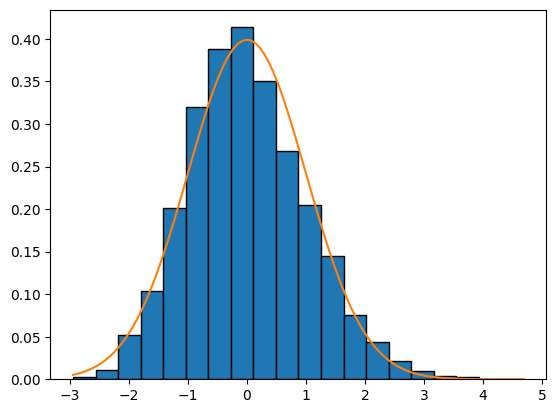

In [ ]:
#--- To keep following outputs, do not run this cell! ---

### TCL et loi forte des grands nombres (LFGN)

Il y a plusieurs façons de présenter le TCL. Nous venons de voir ma façon préférée (très mnémotechnique):

Centrer-réduire une somme de va i.i.d $\longrightarrow$ gaussienne


Mais parfois on présente le TCL en indiquant qu'il permet de préciser la vitesse de convergence de la LFGN.

**A vous:** Trouvez une formule du type :

    S[n]/ n  - mu   ~  f(n) * cst

où

* `f(n)`    est une certaine expression qui tend vers zéro,
* `cst`     ne varie pas selon n (mais n'est pas vraiment constant)
* `~`       n'est pas une équivalence au sens usuel



### Une hypothèse manquante?

Le TCL est un théorème universel puisqu'il est vrai pour toutes les lois.  Toutes?

In [ ]:
""" une fonction effectuant un histogramme tronqué """
def hist_trunc(ech,gauche,droite,nb_batons):
    bins=np.linspace(gauche,droite,nb_batons)
    interval_width=(droite-gauche)/nb_batons
    weigh=np.ones_like(ech)/len(ech)/interval_width
    plt.hist(ech,bins=bins,weights=weigh,edgecolor="k")

""" il faut toujours tester ses fonctions"""
def test():
    X=np.random.normal(size=1000)
    hist_trunc(X,-1,1,10)

""" dressons l'histogramme de la moyenne de n v.a de Cauchy """
def cauchy_sum(n):
    nbEssaies=3000
    collect=[]

    for i in range(nbEssaies):
        X=stats.cauchy.rvs(size=n)
        """ ici on divise par n, au lieu de sqrt(n) comme dans le TCL """
        S=np.sum(X)/n
        collect.append(S)

    hist_trunc(collect,-10,10,20)


    x=np.linspace(-7,7,50)
    plt.plot(x,stats.cauchy.pdf(x))


plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
cauchy_sum(5)
plt.subplot(1,3,2)
cauchy_sum(20)
plt.subplot(1,3,3)
cauchy_sum(30)



Commentons le code ci-dessus: en moyennant des Cauchy on trouve une Cauchy.

Pourquoi est-ce que cela fait une sorte de contre exemple au TCL. Imaginons que le TCL fonctionne pour les Cauchy, alors



         S_n
       -------  -loi-> N(0,1)
       sqrt(n)


Mais alors, si on divise encore par `sqrt(n)`  (qui tend vers l'infini) on a nécessairement:


         S_n
       -------  -loi-> dirac_0
          n


Le TCL ne peut donc pas s'appliquer. On a oublié de le dire mais pour qu'il s'applique il faut que la v.a initiale admette un moment d'ordre 2. Or la cauchy n'a même pas de moment d'ordre 1; d'ailleurs dans notre tentative d'application du TCL on ne l'a même pas centrée (mais comme elle est symétrique, on c'est dit que ce n'est pas la peine).


### Lois stables



En fait pour tout `alpha in ]0,2]` on peut trouver une v.a `X` telle qu'en sommant des copies on a:


           S_n
      -----------  -loi-> une loi particulière
      n^(1/alpha)


Cette loi est alors appelée "loi alpha-stable". Et on dit que `X` est dans le domaine d'attraction de la loi alpha-stable.

La loi normale est la loi 2-stable. La cauchy est le loi 1-stable.

Le TCL nous dit que n'importe quelle v.a qui a un moment d'ordre 2 est dans le domaine d'attraction de la loi 2-stable alias "la loi normale".






### Python-numpy: supprimer la boucle

Quand on a un peu l'habitude, on peut faire le même programme  que le précédent sans boucle `for`;
c'est plus compact et plus rapide (les boucles implicites se font dans un langage compilé).  

#### ♡♡

In [ ]:
n = 20
nbEssaies = 3000


X = np.random.exponential(size=(nbEssaies,n))
S = np.sum(...
S_cr = (S - n) / np.sqrt(n)

plt.hist(S_cr,bins=25,density=True,edgecolor="k")

x = np.linspace(np.min(S_cr),np.max(S_cr), 100)
y = stats.norm.pdf(x)
plt.plot(x,y);

## Estimateurs

### Définitions


On considère un échantillon :  `X = X[0],...,X[n-1]`  représentant des observations i.i.d d'une quantité. On note :

        mu     = E(X[0])
        sigma2 = V(X[0])
        sigma  = sqrt(V(X[0]))

    
Ce sont des caractéristiques de la vraie quantité. Si on n'y a pas accès, on les estime par les *estimateurs* suivant:

        mean(X) = 1/n     sum_i X[i]
        std2(X) = 1/(n-1) sum_i (X[i]-mean(X))**2
        std(X)  =  sqrt(std2(X))

    
En numpy :

        mean(X) = np.mean(X)
        std2(X) = np.std(X,ddof=1)**2
        std(X)  = np.std(X,ddof=1)

    
`ddof=1` permet de préciser que l'on divise par `n-1` (attention, par défaut `ddof=0`).  


Vocabulaire: il y a énormément de manière de noter les estimateurs:

* Pour l'espérance:  `mean(X)` = $\hat \mu$ = `hat_mu`  = $\bar X$
* Pour l'écart-type:  `std(X)` = $\hat {\sigma}$ = `hat_sigma`


### Estimateur sans biais

Dans la formule de l'estimateur de la variance, on divise par `n-1` et pas pas `n`. C'est pour avoir un estimateur sans biais c.à.d vérifiant `E[std2(X)]=sigma2`.






Vérifions que l'estimateur de l'écart-type est sans biais quand on divise par `n-1` (le `-1` correspond au `ddof=1` de la fonction `np.std`). Puisque c'est un exercice de calcul, on va tricher et utiliser du LaTeX.

Notons $\overline X_n$ la moyenne empirique `mean(X)`.
Il s'agit de montrer que la constante $C$ telle que
$$
\mathbf{E}\left[ \frac{1}{C} \sum_{i=1}^{n} (X_i - \overline{X_n})^2 \right] = \mathbf{Var}(X_1),
$$
c'est-à-dire
$$
\sum_{i=1}^{n} \mathbf{E}\left[(X_i - \overline{X_n})^2 \right] = C\ \mathbf{E}\left[ (X_1 - \mathbf E[X_1])^2 \right],
$$
est égale à $n-1$.

On a :

\begin{align*}
& \sum_{i=1}^{n} \mathbf E\left[ \left(X_i - \overline X_n \right)^2 \right] \\
& = \sum_i \left( \mathbf E \left[X_i^2\right] + \mathbf E \left[\overline X_n^2\right] - 2 \mathbf E \left[X_i \overline X_n\right] \right) \\
& = n \mathbf{E} \left[X_1^2\right] + n \mathbf E \left[\overline X_n^2\right] - 2 \mathbf E \left[ \left( \sum_i X_i \right) \overline X_n \right] \\
& = n \mathbf{E} \left[X_1^2\right] - n \mathbf E \left[ \overline X_n^2 \right]
\end{align*}


Or :

\begin{align*}
n \mathbf E \left[ \overline X_n^2 \right]
& = \frac{1}{n} \mathbf E \left[ \sum_{i=1}^n X_i^2 + \sum_{i \neq j} X_i X_j \right] \\
& = \frac{1}{n} n \mathbf E \left[X_1^2\right] + \frac{1}{n} n (n-1) \mathbf E [X_1] ^2 \\
& = \mathbf E \left[X_1^2\right] + (n-1) \mathbf E [X_1] ^2
\end{align*}

D'où :

\begin{align*}
& \sum_{i=1}^{n} \mathbf E\left[ (X_i - \overline X_n)^2\right] \\
& = n \mathbf E [X_1]^2 - \mathbf E [X_1] ^2 - (n-1) \mathbf E [X_1] ^2 \\
& = (n-1)\left( \mathbf E \left[X_1^2\right] - \mathbf E [X_1] ^2 \right)\\
& = (n-1) \mathbf E \left[ \left(X_1 - \mathbf E[X_1]\right)^2 \right]
\end{align*}

Ainsi, l'estimateur non biaisé correspond bien à $C = n-1$.

### Estimateur biaisé

Le fait que `std2(X)` soit sans biais n'implique pas que `std(X)` soit sans biais.


En vertu de l'inégalité de <font color="red"> □ □ □ </font>, on a
$$
\mathbf E[std(X)] = \mathbf E\left[ \sqrt{std2(X)}\right] \color{red}{\square \square \square} \sqrt {\mathbf E[std2(X)]} =\sigma,
$$

L'estimateur de l'écart-type est donc biaisé. Mais on l'utilise quand même.

### Ne pas confondre

Attention à ne pas confondre estimateur et vrai valeur. Par exemple, voici un programme où cette cette confusion a eu lieue. L'auteur de ce programme s'attend à voir un histogramme en forme de cloche. Or, qu'est-ce qu'on observe? Pourquoi?

In [ ]:
n = 8 #nombre de variable sommées
nbEssaies=3000

collect=[]
for i in range(nbEssaies):
    X=np.random.exponential(size=n)
    S=np.sum(X)
    collect.append((S-n*np.mean(X))/np.std(X))

plt.hist(collect,20,density=True,edgecolor="k");

## Intervalle de confiance

### Un exemple

In [4]:
""" Voici les températures du mois d'aout enregistrées à Strasbourg """
X=[32.7, 28.9, 29.1, 32.3, 30.9, 30. , 35.4, 29.2, 29.1, 30.1, 28.9, 28.8, 30.2, 31.9, 30.1, 28.6, 31.5, 33.5, 31.5, 34.7, 29.6, 30.3, 32. , 30. , 29.2, 29.3, 32.2, 28.9, 30.8, 31.5, 30.9]

Un oracle nous indique que l'espérance théorique vaut $\mu=31$ et l'écart-type théorique vaut $\sigma=\sqrt 6$. Comparons ces valeurs à ce que donne une estimation

In [9]:
print("Espérance:")
print("estimation:",np.mean(X))
print("valeur théorique:",31)

In [10]:
print("Écart type:")
print("estimation:",np.std(X,ddof=1))
print("valeur théorique:",np.sqrt(6))

Bon, c'est assez éloigné, mais cela ne signifie pas que notre oracle est très mauvais: simplement on estime un écart-type avec un échantillon petit !

L'intervalle de confiance aide à mettre en regard la taille d'un échantillon et la valeur estimée.

### Intervalle de confiance de la moyenne en connaissant écart-type

D'après le théorème central limite, la moyenne empirique `mean(X)`  est "proche" d'une gaussienne de moyenne `mu` et d'écart-type `sigma/sqrt(n)`, ou encore
```
         mean(X) - mu
        ---------------
        sigma / sqrt(n)
```
est "proche" d'une gaussienne centrée-réduite.

La fonction quantile `ppf` de la gaussienne nous permet de trouver `a` tel que
```
         mean(X) - mu
P[-a < ----------------- < a]  =  0.95
        sigma / sqrt(n)
```





Ce `a` c'est `ppf(1-alpha/2)=ppf(0.975)`.

Personnellement je l'ai appris par coeur: il vaut approximativement 1.95 (facile à retenir pour un intervalle de confiance à 95%).


En remaniant l'inégalité, on obtient:
```
                 a*sigma                        a*sigma
  P [ mean(X) - ---------   < mu. <  mean(X) + -------- ] = 0.95
                 sqrt(n)                        sqrt(n)
```

C'est un intervalle de confiance asymptotique ; il faut `n` "assez grand" pour que cette approximation soit justifiée.

### Le jeu des 95%

Les températures données précédemment ont été générées avec la fonction `generate_temperatures()`






In [13]:
def generate_temperatures(n=31):
    """
    La loi du chi2 à df degrés de liberté (degrees of freedom),
    c'est simplement la somme de df carrés de gaussiennes,
    donc son espérance c'est ...
    Pour la variance il vaut mieux demander à wikipedia
    """
    return np.random.chisquare(df=3,size=n)+28

On a construit cette fonction à l'aide d'une loi du chi2 dont on connait bien les moments: l'orable avait raison, on a bien $\mu=31$ et $\sigma=\sqrt{6}$




 Lançons de nombreuses fois cette fonction, et vérifions que l'espérance théorique tombe dans 95% des cas dans notre intervalle de confiance (attention, il faut recalculer cet intervalle à chaque tirage !).


In [14]:
n = 31
m = 10000

mu = 3 + 28
sigma = np.sqrt(2*3)

a = stats.norm.ppf(0.975)
epsilon = a*sigma/np.sqrt(n)

#### ♡♡

In [15]:
cpt = 0
for i in range(m):
    ech = generate_temperatures(n)
    mean = np.mean(ech)
    ...

print("Proportion de mu dans I:", cpt/m)

### Loi t de Student

Quand on travaille avec des échantillons de petite taille on va plutôt utiliser les quantiles de la loi de Student pour construire l'intervalle de confiance. Observons pourquoi.


Définissons d'abord deux lois importantes pour les stats:

 * `chi2(n)`    est la loi du chi2 à `n` degrés de liberté
 * `t(n)`       est la loi t de Student à `n` degrés de liberté

Elles peuvent être décrites de la manière suivante :

* Si `X[0],...,X[n-1]`sont i.i.d et suivent des `N(0,1)`, alors   `X[0]^2+...+X[n-1]^2` suit une `Chi2(n)`
* Si `Z,U` sont indépendantes avec `Z ~ N(0,1)` et `U ~ Chi2(n)`   alors   `Z/(sqrt(U/n))` suit une `t(n)`




Plus son nombre de degrés de liberté est grand, plus elle s'approche de la loi normale (centrée-réduite) :

In [ ]:
x = np.linspace(-3,3,200)
for df in [1,2,4,5,10]:
    plt.plot(x, stats.t.pdf(x,df), "k", alpha=df/20,
             label=f"df={df}")
plt.plot(x, stats.norm.pdf(x), "k", label="N(0,1)")
plt.legend();

***A vous:*** $(2\heartsuit)$ sur un même graphique, dessinez les densité des lois de Student pour df=1,2,4,5,10. Vérifiez que plus df est grand et plus la loi de student ressemble à la gaussienne.

Aide : utiliser scipy : `stats.t.pdf()`


#### ♡♡


***A vous:*** Expliquez pourquoi la Student avec df=1 c'est la Cauchy.



### Intérêt de la loi de Student


Nous aimerions de nouveau répondre à la question suivante : "de combien  `mean(X)` et `mu` sont éloignés?"



Le TCL (théorème central limite) nous indique que :


           mean(X)-mu
        ----------------    ~  N(0,1)
         sigma/sqrt(n)



Mais quand on travaille avec de vraies observations, on n'a pas accès à `sigma`,  on le remplace donc par son estimation, et il se trouve que:

           mean(X)-mu
        ----------------    ~   t(df=n-1)
          std(X)/sqrt(n)


NB: en fait le symbole `~` est une égalité en loi quand les `X[i]` sont des gaussiennes, sinon c'est une approximation. Vous pouvez facilement montrer cette égalité en loi en utilisant la définision de la loi t de Student qu'on a donnée précédemment.

Ainsi, quand l'échantillon est de petite taille, et que la loi de `X[0]` est approximativement gaussienne, il est tout à fait justifié de remplacer la loi normale par la loi t de Student pour calculer les intervalles de confiance.

Au final cela va simplement changer la constante `a` dans l'intervalle de confiance. Reprenons l'exemple des températures des jours du mois d'aout. Si l'on remplace la nomrmale par la stude à df=31-1 degré de liberté cela change ainsi:

In [16]:
stats.norm.ppf(0.975)

In [18]:
stats.t(30).ppf(0.975)

La différence n'est pas négligeable: l'intervalle de confiance sera plus grand: on est "moins confiant" quand on centre réduit empiriquement.

### Histogramme de la Student



Dans le programme suivant nous suivons une recette :

* Prendre `n` v.a gaussiennes indépendantes
* Faire la moyenne, centrer-réduire empiriquement le tout.
* Et on obtient une v.a de student à `n-1` degrés de liberté.

In [ ]:
nbEssaies=20_000
nbGauss = 4
df=nbGauss-1

sample=np.zeros(nbEssaies)

for i in range(nbEssaies):
    gauss=np.random.normal(size=nbGauss)
    sample[i]=np.mean(gauss)/(np.std(gauss,ddof=1)/np.sqrt(nbGauss))

"""on limite l'intervalle pour avoir un plus beau graphique"""
a, b = [-4, 4]
plt.hist(sample[(a < sample) & (sample < b)], 15, density=True, rwidth=0.1)

x = np.linspace(a, b, 100)
plt.plot(x, stats.t(df=df).pdf(x), label="student")
plt.plot(x, stats.norm.pdf(x), label="gauss")
plt.legend();

On effectue la même chose ci-dessous mais avec l'estimateur biaisé de la variance (`ddof=0`). On voit bien que le résultat n'est ni une gaussienne ni une student.

In [ ]:
nbEssaies=20000
nbGauss = 4
df=nbGauss-1
sample=np.zeros(nbEssaies)

for i in range(nbEssaies):
    gauss=np.random.normal(size=nbGauss)
    sample[i]=np.mean(gauss)/(np.std(gauss)/np.sqrt(nbGauss))

#la suite c'est pour le graphique
a, b = [-4, 4]
plt.hist(sample[(a < sample) & (sample < b)], 15, density=True, rwidth=0.1)
x = np.linspace(a, b, 100)
plt.plot(x, stats.t.pdf(x, df), label="student")
plt.plot(x, stats.norm.pdf(x), label="gauss")
plt.legend();

***A vous:*** Augmentez $(1\heartsuit)$ le paramètre `nbGauss`. Qu'observe-t-on?